In [78]:
%matplotlib inline
import matplotlib
import matplotlib.cm as cm
import matplotlib.pyplot as plt
import math
import numpy as np

from dataclasses import *
import numpy as np
from typing import *

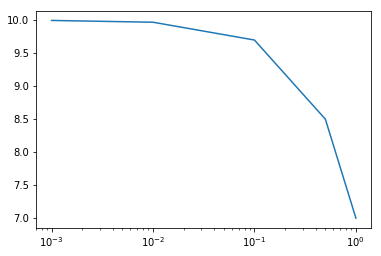

In [56]:
"""
Integration in a square x[0:3] and y[0:2] of x**2 - y**2

Exact value is 10, obtained from integrating first with x:
=> antiderivative [x**3 / 3 - x * y**2] between 0 and 3
=> integrate 18 - 3 * y ** 2 with y
=> antiderivative [18 - y ** 3] between 0 and 2
=> 18 - 8 = 10
"""

@dataclass(frozen=True)
class Range:
    lo: float
    hi: float
    step: float

def estimate_double_integral(x_range: Range, y_range: Range, fct) -> float:
    '''
    total = 0.
    for x in np.arange(x_range.lo, x_range.hi, x_range.step):
        for y in np.arange(y_range.lo, y_range.hi, y_range.step):
            total += fct(x, y) * x_range.step * y_range.step
    return total
    '''
    # Way faster than the loop
    xs = np.arange(x_range.lo, x_range.hi, x_range.step)
    ys = np.arange(y_range.lo, y_range.hi, y_range.step)
    xs, ys = np.meshgrid(xs, ys)
    return np.sum(fct(xs, ys) * x_range.step * y_range.step)

steps = []
approximations = []

for step in [1., 0.5, 0.1, 0.01, 0.001]:
    steps.append(step)
    res = estimate_double_integral(
        x_range=Range(0., 3., step),
        y_range=Range(0., 2., step),
        fct=lambda x, y: x ** 2 - y ** 2)
    approximations.append(res)

plt.plot(steps, approximations)
plt.xscale('log')
plt.show()

In [81]:
"""
Other forms of integral:
- type 1: y interval function of x
- type 2: x interval function of y
"""

def estimate_dependent_integral(x_range: Range, get_y_range, fct) -> float:
    total = 0.
    for x in np.arange(x_range.lo, x_range.hi, x_range.step):
        y_range = get_y_range(x)
        ys = np.arange(y_range.lo, y_range.hi, y_range.step)
        val = np.sum(fct(x, ys) * x_range.step * y_range.step)
        total += val
    return total

step = 0.01
res = estimate_dependent_integral(
    x_range=Range(-1., 1., step),
    get_y_range=lambda x: Range(-math.sqrt(1-x**2), math.sqrt(1-x**2), step=step),
    fct=lambda x, y: np.full(1, y.shape))
print(res)

3.1498000000000017
